In [1]:
# hidden-but-run
import sys
sys.path.insert(0, "..")

In [2]:
from elastipy import Search, query, connections
conn = connections.get()

In [3]:
INDEX = "elastipy-example-setiquest-irc" 

<AxesSubplot:xlabel='month'>

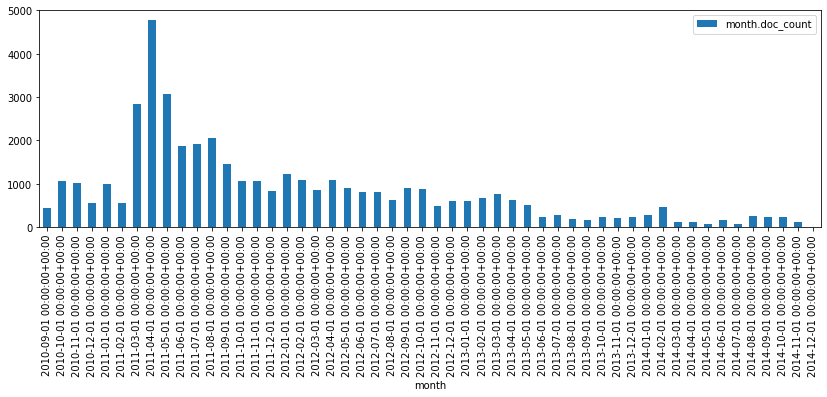

In [4]:
Search(index=INDEX) \
    .agg_date_histogram("month", calendar_interval="month") \
    .execute().df(to_index="month").plot.bar(figsize=(14, 4))

In [63]:
KEYWORDS = [
    "radio", "telescope", "meeting", "setiquest", 
    "form", "wiki", "community", "code", "project",
    "work", "help", "question", "alien", "ufo",
    #"analysis", 
    "source", "signal", "seti", "detect",
]
agg = Search(index=INDEX) \
    .agg_filters("keyword", filters={
        key: query.QueryString(f"text: *{key}*")
        for key in KEYWORDS
    }) \
    .metric_cardinality("users", field="user")

agg.execute().dump.table(sort="-keyword.doc_count")

keyword   │ keyword.doc_count                            │ users                                     
──────────┼──────────────────────────────────────────────┼───────────────────────────────────────────
seti      │ 3388 ██████████████████████████████████████▉ │ 99 ██████████████████████████████████████▉
setiquest │ 1749 ████████████████████▋                   │ 72 ████████████████████████████▋          
work      │ 1026 ████████████▌                           │ 63 █████████████████████████▎             
wiki      │  812 ██████████                              │ 55 ██████████████████████                 
project   │  747 █████████▍                              │ 66 ██████████████████████████▍            
meeting   │  491 ██████▌                                 │ 36 ██████████████▊                        
code      │  447 █████▉                                  │ 52 ████████████████████▉                  
community │  436 █████▉                                  │ 44 █████████████████▉  

In [64]:
agg = Search(index=INDEX) \
    .agg_filters("keyword", filters={
        key: query.QueryString(f"text: *{key}*")
        for key in KEYWORDS
    }) \
    .agg_date_histogram("year", fixed_interval="90d", min_doc_count=0) \
    .metric_cardinality("users", field="user")

agg.execute().dump.heatmap(cell_width=4, sort=("year", "keyword"))

                         ┌──┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┐ ██ 719.0
                         │                     ░░░░                                                 │ ▓▓ 659.083
2013-11-11T00:00:00.000Z ┼                     ░░░░                                                 ┼ ▒▒ 599.167
                         │                     ░░░░                                                 │ ██ 539.25
2013-08-13T00:00:00.000Z ┼                     ░░░░                                                 ┼ ▓▓ 479.333
                         │                     ░░░░                                                 │ ▒▒ 419.417
2013-05-15T00:00:00.000Z ┼                     ░░░░                                                 ┼ ██ 359.5
                         │ ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░████▒▒▒▒░░░░░░░░░░░░░░░░░░░░▒▒▒▒ │ ▓▓ 299.583
2013-02-14T00:00:00.000Z ┼ ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░████▒▒▒▒░░░░░░░░░░░░░░░░░░░░▒▒▒▒ ┼

In [43]:
s = Search(index=INDEX).match("text", "code")
print(list(s.agg_significant_terms(field="text", size=100).execute().keys()))

['code', 'release', 'summer', 'source', 'the', 'google', 'released', 'to', 'backendserver', 'gpl', 'sonata', 'documented', 'of', 'is', 'decoding', 'qr', 'documentation', 'gsoc', 'and', 'documenting', 'a', 'in', 'contributed', 'commented', 'license', 'it', 'modularization', 'radians', 'that', 'open', 'be', 'under', 'meta', 'base', 'releasing', 'contributions', 'development', 'someone', 'with', 'aspects', 'i', 'for', 'setiquest.org', 'we', 'doxygen', 'but', 'contribution', 'quiz', 'snapshot', 'angle', 'through', 'at', 'without', 'understand', 'write', 'review', 'separate', 'github', 'if', 'have', 'si', 'before', 'our', 'compatible', 'sourcing', 'helping', 'not', 'releases', 'lgpl', 'can', 'fftw', 'need', 'are', 'apache', 'so', 'mit', 'use', 'out', 'fftss', 'document', 'will', 'there', 'require', 'all', 'itself', 'otherwise', 'sell', 'buy', 'process', 'adding', 'do', 'commercial', 'library', 'some', 'licensed', 'from', 'than', 'think', 'or', 'this']


In [57]:
s = Search(index=INDEX).query_string("text: *signal*")
s.agg_significant_terms(field="text", size=50).execute().dump.table(sort="-a0.doc_count")

a0                         │ a0.doc_count                               
───────────────────────────┼────────────────────────────────────────────
signal                     │ 242 ███████████████████████████████████████
the                        │ 240 ██████████████████████████████████████▋
to                         │ 164 ██████████████████████████▊            
signals                    │ 150 ████████████████████████▌              
a                          │ 146 ███████████████████████▉               
of                         │ 133 █████████████████████▉                 
that                       │ 123 ████████████████████▍                  
is                         │ 115 ███████████████████                    
and                        │ 106 █████████████████▋                     
in                         │  98 ████████████████▍                      
for                        │  78 █████████████▎                         
data                       │  44 ███████▉          

In [7]:
Search(index=INDEX).execute().hits

{'total': {'value': 10000, 'relation': 'gte'},
 'max_score': 1.0,
 'hits': [{'_index': 'elastipy-example-setiquest-irc',
   '_type': '_doc',
   '_id': '20100928-0',
   '_score': 1.0,
   '_source': {'index': 0,
    'timestamp': '2010-09-28T10:59:00',
    'raw_line': 'avinash: Welcome everyone.',
    'user': 'avinash',
    'event': 'write',
    'text': 'Welcome everyone.',
    'timestamp_hour': 10,
    'timestamp_weekday': '2 Tuesday'}},
  {'_index': 'elastipy-example-setiquest-irc',
   '_type': '_doc',
   '_id': '20100928-1',
   '_score': 1.0,
   '_source': {'index': 1,
    'timestamp': '2010-09-28T11:00:00',
    'raw_line': 'avinash: We can start off with everyone saying one sentence about themselves.',
    'user': 'avinash',
    'event': 'write',
    'text': 'We can start off with everyone saying one sentence about themselves.',
    'timestamp_hour': 11,
    'timestamp_weekday': '2 Tuesday'}},
  {'_index': 'elastipy-example-setiquest-irc',
   '_type': '_doc',
   '_id': '20100928-2',
 

In [8]:
conn.termvectors(
    index=INDEX, 
    id="20100928-3",
    term_statistics=True,
    field_statistics=True,
)

{'_index': 'elastipy-example-setiquest-irc',
 '_type': '_doc',
 '_id': '20100928-3',
 '_version': 1,
 'found': True,
 'took': 0,
 'term_vectors': {'text': {'field_statistics': {'sum_doc_freq': 254047,
    'doc_count': 24371,
    'sum_ttf': 272510},
   'terms': {'activities': {'doc_freq': 9,
     'ttf': 9,
     'term_freq': 1,
     'tokens': [{'position': 15, 'start_offset': 81, 'end_offset': 91}]},
    'am': {'doc_freq': 621,
     'ttf': 647,
     'term_freq': 1,
     'tokens': [{'position': 9, 'start_offset': 40, 'end_offset': 42}]},
    'and': {'doc_freq': 3260,
     'ttf': 3648,
     'term_freq': 1,
     'tokens': [{'position': 7, 'start_offset': 34, 'end_offset': 37}]},
    'avinash': {'doc_freq': 314,
     'ttf': 316,
     'term_freq': 1,
     'tokens': [{'position': 6, 'start_offset': 26, 'end_offset': 33}]},
    'co': {'doc_freq': 8,
     'ttf': 8,
     'term_freq': 1,
     'tokens': [{'position': 12, 'start_offset': 59, 'end_offset': 61}]},
    'for': {'doc_freq': 2292,
     't